## Genre Classification

In [1]:
import pandas as pd 
import warnings
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import string
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
# nltk.download()


In [2]:
df_train=pd.read_csv("./Task 1 Data/train_data.txt",delimiter=':::',header=None,names=['Movies_Name','Genre','Description'])
df_test=pd.read_csv("./Task 1 Data/test_data.txt",delimiter=':::',header=None,names=['Movies_Name','Description'])

<Axes: title={'center': 'Count Plot For Movies'}, xlabel='Genre', ylabel='count'>

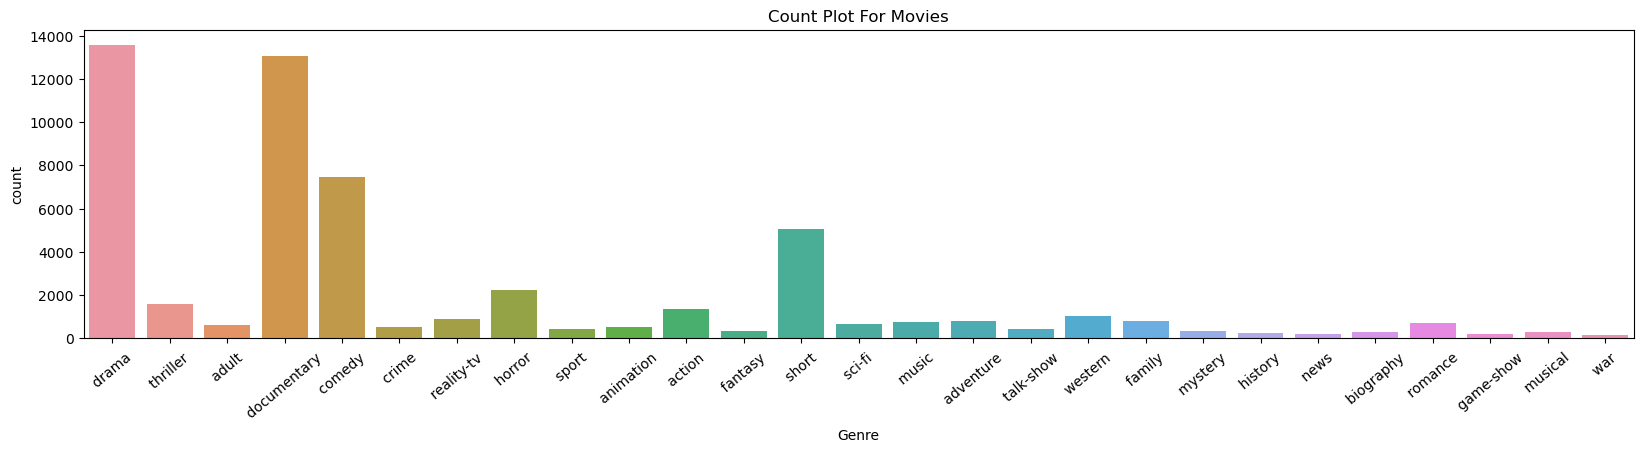

In [3]:
df_train
plt.figure(figsize=(20,4))
plt.xticks(rotation=40)
plt.title('Count Plot For Movies')
sns.countplot(data=df_train,x=df_train['Genre'])

In [4]:
df_test

,Movies_Name,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [5]:
stopword=stopwords.words('english')

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'@\S+', '', text) 
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text) 
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ') 
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip() 
    return text


df_train['Cleaned Data']=df_train['Description'].apply(clean_text)
df_test['Cleaned Data']=df_test['Description'].apply(clean_text)

In [6]:
df_test.head()

,Movies_Name,Description,Cleaned Data
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [7]:
df_train.head()

,Movies_Name,Genre,Description,Cleaned Data
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...


In [8]:
df_train.shape,df_test.shape

((54214, 4), (54200, 3))

In [9]:
df_train.isnull().sum()

Movies_Name     0
Genre           0
Description     0
Cleaned Data    0
dtype: int64

In [10]:
df_test.shape

(54200, 3)

In [11]:
df_train['Genre'].value_counts().sort_values

<bound method Series.sort_values of  drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64>

In [12]:
df_train['Genre'] = pd.Categorical(df_train['Genre'])
df_train['labels'] = df_train['Genre'].cat.codes

In [13]:
df_train

,Movies_Name,Genre,Description,Cleaned Data,labels
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...,8
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,1
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,8
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...,8
...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...,5
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...,13
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...,7
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...,5


In [14]:
x=df_train.iloc[:,3]
y=df_train['labels']

In [15]:
x

1        listening conversation doctor parents year old...
2        brother sister past incestuous relationship cu...
3        bus empties students field trip museum natural...
4        help unemployed father make ends meet edith tw...
5        films title refers recovered bodies ground zer...
                               ...                        
54210    short lived nbc live sitcom centered bonino wo...
54211    next generation exploitation sisters kapa bay ...
54212    bestaan echt stand comedy growing facing fears...
54213    walter vivian live country difficult time keep...
54214    labor day weekend intense hurricane ever make ...
Name: Cleaned Data, Length: 54214, dtype: object

In [16]:
y

1         8
2        24
3         1
4         8
5         8
         ..
54210     5
54211    13
54212     7
54213     5
54214    12
Name: labels, Length: 54214, dtype: int8

In [17]:
vectorize = TfidfVectorizer()
X = vectorize.fit_transform(x)
test_data=vectorize.transform(df_test['Description'])
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
ls=vectorize.get_feature_names_out()

In [18]:
len(ls),ls

(124210,
 array(['aaa', 'aaadyatmic', 'aaas', ..., 'zylkin', 'zypcio', 'zyzyphus'],
       dtype=object))

In [19]:
from sklearn.linear_model import LogisticRegression
LRmodel=LogisticRegression()
LRmodel.fit(x_train,y_train)
y_pred=LRmodel.predict(x_test)
accuracy_score(y_pred,y_test)

0.574239163848755

In [20]:
from sklearn.naive_bayes import MultinomialNB
NBmodel=MultinomialNB()
NBmodel.fit(x_train, y_train)
y_pred=NBmodel.predict(x_test)
accuracy_score(y_pred,y_test)

0.44340608668920994

In [21]:
from sklearn.svm import SVC
SVCmodel = SVC()
SVCmodel.fit(x_train, y_train)
y_pred=SVCmodel.predict(x_test)
accuracy_score(y_pred,y_test)

#### Testing All Model On Test Data

In [ ]:
LRmodel.predict(test_data)

array([8, 8, 7, ..., 8, 5, 7], dtype=int8)

In [ ]:
NBmodel.predict(test_data)

array([8, 8, 7, ..., 8, 8, 7], dtype=int8)

In [ ]:
SVCmodel.predict(test_data)

array([8, 8, 7, ..., 8, 8, 7], dtype=int8)